# PFGAP vs KNN Results Analysis
This notebook analyzes experimental results from the PFGAP vs KNN testing pipeline by calling analysis functions in separate cells.

## 1. Import Required Libraries
Import the analyze_results module and other necessary libraries for the analysis workflow.

In [1]:
# Import the analyze_results module and necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from load_results import load_results

# Set up matplotlib for inline plots
%matplotlib inline

# Set seaborn style for better plots
sns.set_style("whitegrid")

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


## 2. Load Experimental Results
Load the summary and seed results from the results directory using the load_results function.

In [2]:
# Load all experimental results as a flat DataFrame
results_df = load_results()

print(f"\n📊 Successfully loaded results: {results_df.shape[0]} rows × {results_df.shape[1]} columns")
print(f"Seeds analyzed: {sorted(results_df['seed'].unique())}")
print(f"Methods: {results_df['method'].unique()}")

# Display basic info about the DataFrame
print(f"\nColumn names: {list(results_df.columns)}")

# Show a sample of the data
print(f"\nSample data:")
results_df.sample(4)

✓ Loaded results from seed 161
✓ Loaded results from seed 737
✓ Loaded results from seed 102
✓ Loaded results from seed 821
✓ Loaded results from seed 61
✓ Loaded results from seed 2
✓ Loaded results from seed 346
✓ Loaded results from seed 982
✓ Loaded results from seed 67
✓ Loaded results from seed 78
✓ Loaded 10 seed results

📊 Successfully loaded results: 130 rows × 10 columns
Seeds analyzed: [np.int64(2), np.int64(61), np.int64(67), np.int64(78), np.int64(102), np.int64(161), np.int64(346), np.int64(737), np.int64(821), np.int64(982)]
Methods: ['KNN-Manifold' 'KNN-Euclidean' 'PFGAP-Euclidean']

Column names: ['seed', 'method', 'k', 'distance_metric', 'accuracy', 'f1_score', 'precision', 'recall', 'confusion_matrix', 'outlier_scores']

Sample data:


,seed,method,k,distance_metric,accuracy,f1_score,precision,recall,confusion_matrix,outlier_scores
16,737,KNN-Euclidean,4.0,euclidean,0.835165,0.834766,0.839453,0.835165,"[[40, 5], [10, 36]]","[1.233843171095775, 4.579654326054979, 0.35477..."
104,67,KNN-Manifold,1.0,sphere_manifold,1.000000,1.000000,1.000000,1.000000,"[[45, 0], [0, 46]]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
21,737,KNN-Manifold,16.0,sphere_manifold,0.835165,0.835045,0.836746,0.835165,"[[39, 6], [9, 37]]","[1.1566283655681295, 4.295164939834691, 0.6738..."
71,2,KNN-Manifold,12.0,sphere_manifold,1.000000,1.000000,1.000000,1.000000,"[[46, 0], [0, 45]]","[2.133346081468202, 3.5038102344700537, 3.4894..."


# Visualizations

In [3]:
# Create aggregated results for KNN methods by finding best k values
def create_comparison_dataframe(df):
    """Create a comparison dataframe with best KNN performance and PFGAP results"""
    
    # Get PFGAP results (already flat, no aggregation needed)
    pfgap_results = df[df['method'] == 'PFGAP-Euclidean'].copy()
    pfgap_results['comparison_method'] = 'PFGAP'
    pfgap_results['best_k'] = np.nan  # No k for PFGAP
    
    # Get KNN results and find best k for each seed and distance metric
    knn_results = df[df['method'].str.startswith('KNN')].copy()
    
    # Aggregate KNN results by finding best k value for each seed and method
    knn_aggregated = []
    
    for seed in knn_results['seed'].unique():
        for method in ['KNN-Manifold', 'KNN-Euclidean']:
            seed_method_data = knn_results[(knn_results['seed'] == seed) & (knn_results['method'] == method)]
            
            if not seed_method_data.empty:
                # Find the row with best accuracy
                best_row = seed_method_data.loc[seed_method_data['accuracy'].idxmax()].copy()
                best_row['comparison_method'] = method
                best_row['best_k'] = best_row['k']
                knn_aggregated.append(best_row)
    
    knn_aggregated_df = pd.DataFrame(knn_aggregated)
    
    # Combine PFGAP and aggregated KNN results
    comparison_df = pd.concat([pfgap_results, knn_aggregated_df], ignore_index=True)
    
    return comparison_df

# Create the comparison dataframe
comparison_df = create_comparison_dataframe(results_df)

print("Comparison DataFrame (best k values for KNN):")
print(f"Shape: {comparison_df.shape}")
display(comparison_df[['seed', 'comparison_method', 'best_k', 'accuracy', 'f1_score', 'precision', 'recall']])

# Show summary statistics
print("\nSummary statistics by method:")
summary_stats = comparison_df.groupby('comparison_method')[['accuracy', 'f1_score', 'precision', 'recall']].agg(['mean', 'std', 'min', 'max'])
display(summary_stats)

Comparison DataFrame (best k values for KNN):
Shape: (30, 12)


,seed,comparison_method,best_k,accuracy,f1_score,precision,recall
0,161,PFGAP,NaN,0.989011,0.989011,0.989250,0.989011
1,737,PFGAP,NaN,0.835165,0.835125,0.835287,0.835165
2,102,PFGAP,NaN,1.000000,1.000000,1.000000,1.000000
3,821,PFGAP,NaN,1.000000,1.000000,1.000000,1.000000
4,61,PFGAP,NaN,0.945055,0.945055,0.945283,0.945055
5,2,PFGAP,NaN,1.000000,1.000000,1.000000,1.000000
6,346,PFGAP,NaN,1.000000,1.000000,1.000000,1.000000
7,982,PFGAP,NaN,0.989011,0.989011,0.989250,0.989011
8,67,PFGAP,NaN,1.000000,1.000000,1.000000,1.000000
9,78,PFGAP,NaN,0.670330,0.669531,0.671337,0.670330



Summary statistics by method:


accuracy                           f1_score            \
                       mean       std       min  max      mean       std   
comparison_method                                                          
KNN-Euclidean      0.951648  0.101141  0.703297  1.0  0.951601  0.101212   
KNN-Manifold       0.951648  0.101141  0.703297  1.0  0.951601  0.101212   
PFGAP              0.942857  0.108761  0.670330  1.0  0.942773  0.108988   

                                 precision                             recall  \
                        min  max      mean       std       min  max      mean   
comparison_method                                                               
KNN-Euclidean      0.703225  1.0  0.952128  0.100612  0.703323  1.0  0.951648   
KNN-Manifold       0.703225  1.0  0.952128  0.100612  0.703323  1.0  0.951648   
PFGAP              0.669531  1.0  0.943041  0.108490  0.671337  1.0  0.942857   

                                            
                        std       min  max  
comparison_method                           
KNN-Euclidean      0.101141  0.703297  1.0  
KNN-Manifold       0.101141  0.703297  1.0  
PFGAP              0.108761  0.670330  1.0

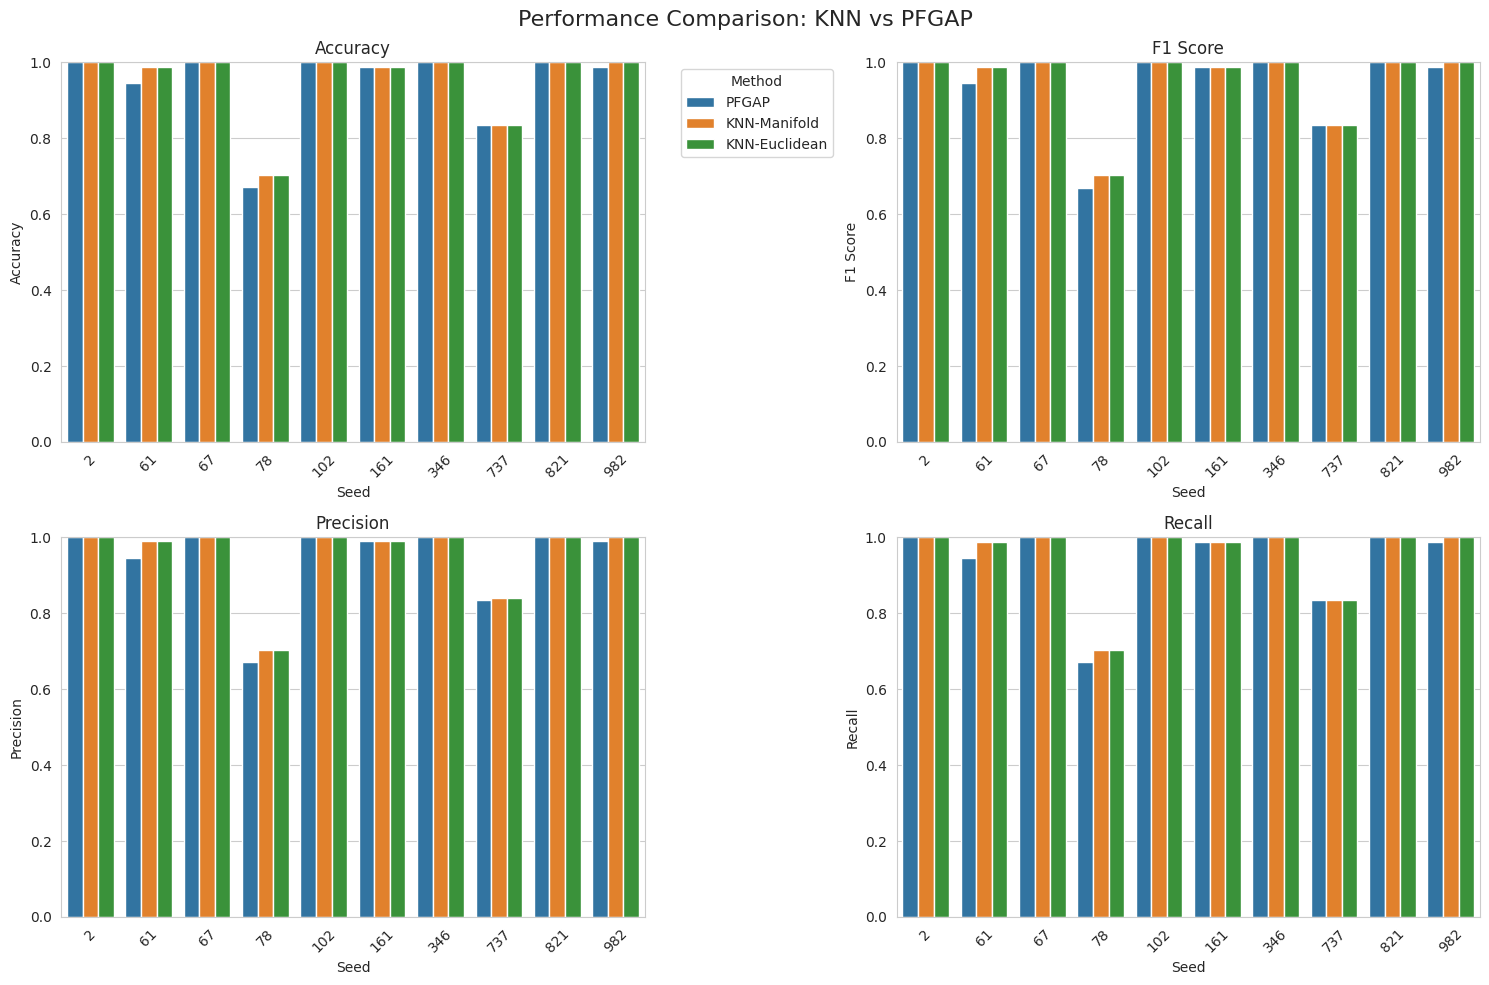

In [4]:
def plot_all_metrics(comparison_df):
    """Plot all metrics in a 2x2 subplot"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Performance Comparison: KNN vs PFGAP', fontsize=16)
    
    metrics = ['accuracy', 'f1_score', 'precision', 'recall']
    
    for i, metric in enumerate(metrics):
        ax = axes[i//2, i%2]
        sns.barplot(data=comparison_df, x="seed", y=metric, hue="comparison_method", ax=ax)
        ax.set_title(f"{metric.replace('_', ' ').title()}")
        ax.set_ylabel(metric.replace('_', ' ').title())
        ax.set_xlabel("Seed")
        ax.set_ylim(0, 1)
        ax.tick_params(axis='x', rotation=45)
        
        # Only show legend on first subplot
        if i == 0:
            ax.legend(title="Method", bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            ax.legend().set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Plot all metrics together
plot_all_metrics(comparison_df)

In [10]:
# Calculate the difference in accuracy between methods for each seed
pivot = comparison_df.pivot(index='seed', columns='comparison_method', values='accuracy')

# Only keep seeds where all methods are present
pivot = pivot.dropna()

# Compute differences
pivot['KNN-Manifold - PFGAP'] = pivot['KNN-Manifold'] - pivot['PFGAP']
pivot['KNN-Euclidean - PFGAP'] = pivot['KNN-Euclidean'] - pivot['PFGAP']

print("Difference in accuracy between methods for each seed:")
display(pivot[['KNN-Manifold - PFGAP', 'KNN-Euclidean - PFGAP']])

Difference in accuracy between methods for each seed:


comparison_method,KNN-Manifold - PFGAP,KNN-Euclidean - PFGAP
seed,,
2,0.000000,0.000000
61,0.043956,0.043956
67,0.000000,0.000000
78,0.032967,0.032967
102,0.000000,0.000000
161,0.000000,0.000000
346,0.000000,0.000000
737,0.000000,0.000000
821,0.000000,0.000000


Found PFGAP confusion matrices: 10
Found KNN-Manifold confusion matrices: 10
Found KNN-Euclidean confusion matrices: 10


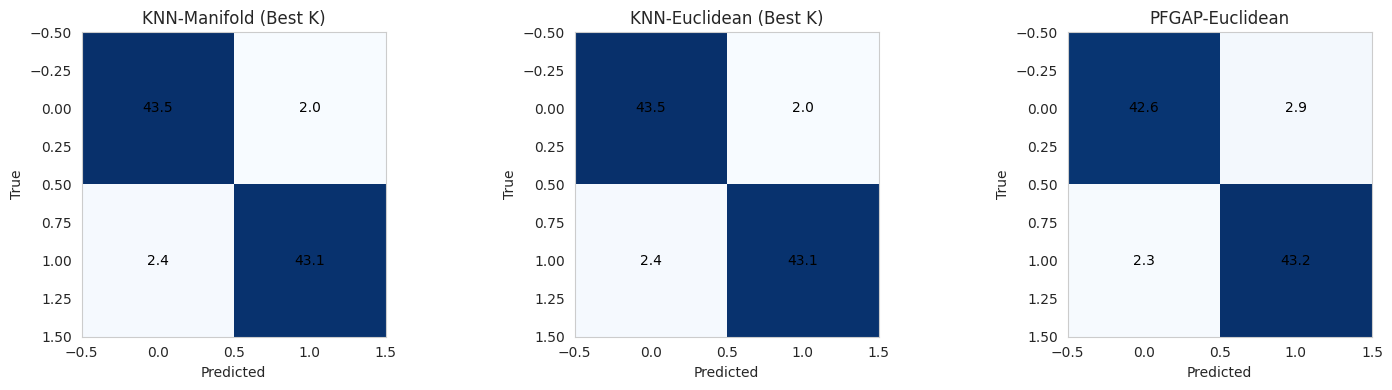

In [6]:
def plot_average_confusion_matrices(comparison_df):
    """
    Plots the average confusion matrices for KNN (best k for each distance metric) and PFGAP 
    across all available seeds, using a shared colorbar.
    """
    # Helper to average confusion matrices
    def average_confusion_matrices(matrices):
        matrices = [np.array(m) for m in matrices if m is not None and len(m) > 0]
        if not matrices:
            return None
        return np.mean(matrices, axis=0)

    # Get confusion matrices for each method from the comparison dataframe (which has best k values)
    pfgap_matrices = comparison_df[comparison_df['comparison_method'] == 'PFGAP']['confusion_matrix'].tolist()
    knn_manifold_matrices = comparison_df[comparison_df['comparison_method'] == 'KNN-Manifold']['confusion_matrix'].tolist()
    knn_euclidean_matrices = comparison_df[comparison_df['comparison_method'] == 'KNN-Euclidean']['confusion_matrix'].tolist()

    # Calculate average confusion matrices
    pfgap_avg = average_confusion_matrices(pfgap_matrices)
    knn_manifold_avg = average_confusion_matrices(knn_manifold_matrices)
    knn_euclidean_avg = average_confusion_matrices(knn_euclidean_matrices)

    # Debug: Print what we found
    print(f"Found PFGAP confusion matrices: {len([m for m in pfgap_matrices if m is not None])}")
    print(f"Found KNN-Manifold confusion matrices: {len([m for m in knn_manifold_matrices if m is not None])}")
    print(f"Found KNN-Euclidean confusion matrices: {len([m for m in knn_euclidean_matrices if m is not None])}")

    # Determine global min/max for color scale
    all_matrices = [m for m in [pfgap_avg, knn_manifold_avg, knn_euclidean_avg] if m is not None]
    if not all_matrices:
        print("No confusion matrices found!")
        return
    
    vmin = min(m.min() for m in all_matrices)
    vmax = max(m.max() for m in all_matrices)

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    ims = []
    plot_configs = [
        (knn_manifold_avg, "KNN-Manifold (Best K)"),
        (knn_euclidean_avg, "KNN-Euclidean (Best K)"),
        (pfgap_avg, "PFGAP-Euclidean")
    ]
    
    for ax, (avg_mat, title) in zip(axes, plot_configs):
        if avg_mat is not None:
            im = ax.imshow(avg_mat, cmap="Blues", vmin=vmin, vmax=vmax)
            ims.append(im)
            
            # Add text annotations
            for i in range(avg_mat.shape[0]):
                for j in range(avg_mat.shape[1]):
                    ax.text(j, i, f"{avg_mat[i, j]:.1f}", ha="center", va="center", color="black")
            
            ax.set_xlabel("Predicted")
            ax.set_ylabel("True")
            ax.set_title(title)
            ax.grid(False)
        else:
            ax.set_visible(False)

   
    
    plt.tight_layout()
    plt.show()

# Plot the confusion matrices
plot_average_confusion_matrices(comparison_df)

In [7]:
# Outlier Analysis - now much simpler with the flat DataFrame!
print("📊 Outlier Score Analysis")

# Check outlier score availability
outlier_summary = results_df.groupby('method')['outlier_scores'].apply(lambda x: x.notna().sum())
print(f"\nOutlier scores available by method:")
for method, count in outlier_summary.items():
    print(f"  {method}: {count} rows")

# Show some example outlier scores
print(f"\nExample outlier scores (first few values):")
for method in results_df['method'].unique():
    method_data = results_df[results_df['method'] == method].iloc[0]
    if method_data['outlier_scores'] is not None:
        scores = method_data['outlier_scores']
        print(f"  {method} (seed {method_data['seed']}, k={method_data['k']}): {len(scores)} scores, range: [{min(scores):.3f}, {max(scores):.3f}]")

# Function to get outlier scores for a specific seed and method
def get_outlier_scores(seed, method, k=None):
    """Get outlier scores for a specific seed, method, and k value (if applicable)"""
    if k is not None:
        row = results_df[(results_df['seed'] == seed) & (results_df['method'] == method) & (results_df['k'] == k)]
    else:
        row = results_df[(results_df['seed'] == seed) & (results_df['method'] == method)]
    
    if not row.empty:
        return row.iloc[0]['outlier_scores']
    return None

# Example: Get outlier scores for seed 737
seed = 737
pfgap_scores = get_outlier_scores(seed, 'PFGAP-Euclidean')
knn_manifold_scores = get_outlier_scores(seed, 'KNN-Manifold', k=8)
knn_euclidean_scores = get_outlier_scores(seed, 'KNN-Euclidean', k=8)

print(f"\nExample outlier scores for seed {seed}:")
if pfgap_scores is not None:
    print(f"  PFGAP-Euclidean: {len(pfgap_scores)} scores")
if knn_manifold_scores is not None:
    print(f"  KNN-Manifold (k=8): {len(knn_manifold_scores)} scores")
if knn_euclidean_scores is not None:
    print(f"  KNN-Euclidean (k=8): {len(knn_euclidean_scores)} scores")

# Show the DataFrame structure for outlier analysis
print(f"\nDataFrame ready for outlier analysis:")
print(f"Shape: {results_df.shape}")
print(f"Methods: {results_df['method'].unique()}")
display(results_df[['seed', 'method', 'k', 'accuracy']].head())

📊 Outlier Score Analysis

Outlier scores available by method:
  KNN-Euclidean: 60 rows
  KNN-Manifold: 60 rows
  PFGAP-Euclidean: 10 rows

Example outlier scores (first few values):
  KNN-Manifold (seed 161, k=1.0): 209 scores, range: [0.000, 0.000]
  KNN-Euclidean (seed 161, k=1.0): 209 scores, range: [0.000, 0.000]
  PFGAP-Euclidean (seed 161, k=nan): 209 scores, range: [0.000, 103.767]

Example outlier scores for seed 737:
  PFGAP-Euclidean: 209 scores
  KNN-Manifold (k=8): 209 scores
  KNN-Euclidean (k=8): 209 scores

DataFrame ready for outlier analysis:
Shape: (130, 10)
Methods: ['KNN-Manifold' 'KNN-Euclidean' 'PFGAP-Euclidean']


,seed,method,k,accuracy
0,161,KNN-Manifold,1.0,0.989011
1,161,KNN-Euclidean,1.0,0.989011
2,161,KNN-Manifold,4.0,0.989011
3,161,KNN-Euclidean,4.0,0.989011
4,161,KNN-Manifold,8.0,0.989011


In [8]:
# Get outlier scores for a specific seed using the flat DataFrame
def get_scores_for_seed(seed, method, k=None):
    """Helper function to get outlier scores from the flat DataFrame"""
    if k is not None:
        mask = (results_df['seed'] == seed) & (results_df['method'] == method) & (results_df['k'] == k)
    else:
        mask = (results_df['seed'] == seed) & (results_df['method'] == method)
    
    row = results_df[mask]
    if not row.empty:
        return row.iloc[0]['outlier_scores']
    return None

# Example: Get outlier scores for seed 737
seed = 737
pfgap_scores = get_scores_for_seed(seed, 'PFGAP-Euclidean')
knn_scores = get_scores_for_seed(seed, 'KNN-Manifold', k=8)

print(f"Outlier scores for seed {seed}:")
print(f"PFGAP scores: {len(pfgap_scores) if pfgap_scores is not None else 'None'}")
print(f"KNN-Manifold (k=8) scores: {len(knn_scores) if knn_scores is not None else 'None'}")

if knn_scores is not None:
    print(f"First few KNN scores: {knn_scores[:10]}")
    print(f"KNN score range: [{min(knn_scores):.3f}, {max(knn_scores):.3f}]")

Outlier scores for seed 737:
PFGAP scores: 209
KNN-Manifold (k=8) scores: 209
First few KNN scores: [1.035009988970251, 4.328956124369376, 0.32685712340069467, 1.8558180733162568, 0.5840766544232027, 1.1201943743331593, 0.1647850626620059, 0.24209788750471936, 1.8411734442001453, 21.59306606290638]
KNN score range: [0.000, 21.593]


In [9]:
from Experiment4functions import create_3d_sphere_data
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

TRAIN_TEST_SPLIT = 0.7

def get_scores_for_seed(seed, method, k=None):
    """Helper function to get outlier scores from the flat DataFrame"""
    if k is not None:
        mask = (results_df['seed'] == seed) & (results_df['method'] == method) & (results_df['k'] == k)
    else:
        mask = (results_df['seed'] == seed) & (results_df['method'] == method)
    
    row = results_df[mask]
    if not row.empty:
        return row.iloc[0]['outlier_scores']
    return None

def plot_outlier_scores_3d(seed, k_value=8):
    """Plot outlier scores in 3D using the flat DataFrame"""
    # Generate the data
    data, labels, sphere = create_3d_sphere_data(seed)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        data, labels, test_size=1-TRAIN_TEST_SPLIT, 
        random_state=seed, stratify=labels
    )

    # Get outlier scores from the flat DataFrame
    pfgap_scores = get_scores_for_seed(seed, 'PFGAP-Euclidean')
    knn_scores = get_scores_for_seed(seed, 'KNN-Manifold', k=k_value)

    if pfgap_scores is None or knn_scores is None:
        print(f"❌ Could not find outlier scores for seed {seed}")
        print(f"PFGAP available: {pfgap_scores is not None}")
        print(f"KNN-Manifold (k={k_value}) available: {knn_scores is not None}")
        
        # Show which seeds have PFGAP data
        pfgap_seeds = results_df[results_df['method'] == 'PFGAP-Euclidean']['seed'].unique()
        print(f"Seeds with PFGAP data: {sorted(pfgap_seeds)}")
        return None

    # Normalize scores for marker size
    pfgap_scores = np.array(pfgap_scores)
    knn_scores = np.array(knn_scores)
    
    pfgap_range = np.ptp(pfgap_scores)
    knn_range = np.ptp(knn_scores)
    pfgap_norm = (pfgap_scores - pfgap_scores.min()) / (pfgap_range if pfgap_range > 0 else 1)
    knn_norm = (knn_scores - knn_scores.min()) / (knn_range if knn_range > 0 else 1)
    
    # Create a figure with subplots
    fig = make_subplots(
        rows=1, cols=2,
        specs=[[{'type': 'scene'}, {'type': 'scene'}]],
        subplot_titles=(f'PFGAP Outlier Scores', f'KNN (k={k_value}) Outlier Scores'),
        horizontal_spacing=0.05
    )
    
    # Add traces for PFGAP
    fig.add_trace(
        go.Scatter3d(
            x=X_train[:, 0],
            y=X_train[:, 1],
            z=X_train[:, 2],
            mode='markers',
            marker=dict(
                size=5 + 15 * pfgap_norm,
                color=y_train,
                colorscale='RdBu',
                opacity=0.8,
                line=dict(width=0.5, color='DarkSlateGrey')
            ),
            text=[f"PFGAP Score: {score:.4f}" for score in pfgap_scores],
            hoverinfo='text',
            name='PFGAP'
        ),
        row=1, col=1
    )
    
    # Add traces for KNN
    fig.add_trace(
        go.Scatter3d(
            x=X_train[:, 0],
            y=X_train[:, 1],
            z=X_train[:, 2],
            mode='markers',
            marker=dict(
                size=5 + 15 * knn_norm,
                color=y_train,
                colorscale='RdBu',
                opacity=0.8,
                line=dict(width=0.5, color='DarkSlateGrey')
            ),
            text=[f"KNN Score: {score:.4f}" for score in knn_scores],
            hoverinfo='text',
            name='KNN'
        ),
        row=1, col=2
    )
    
    # Set identical initial camera position
    camera = dict(eye=dict(x=1.5, y=1.5, z=1.5))
    
    fig.update_layout(
        height=600,
        width=1200,
        title_text=f"Outlier Score Comparison (Seed: {seed})",
        scene=dict(
            xaxis_title="X",
            yaxis_title="Y",
            zaxis_title="Z",
            camera=camera,
            uirevision="same_view"
        ),
        scene2=dict(
            xaxis_title="X",
            yaxis_title="Y",
            zaxis_title="Z",
            camera=camera,
            uirevision="same_view"
        )
    )
    
    return fig

# Display interactive plot for seed 67 (which has PFGAP data)
print("🎯 Creating 3D outlier score visualization...")
fig = plot_outlier_scores_3d(78, k_value=8)
if fig:
    fig.show()
else:
    print("Could not create 3D plot - trying different seed...")
    # Try seed 161 as backup
    fig = plot_outlier_scores_3d(161, k_value=8)
    if fig:
        fig.show()

🎯 Creating 3D outlier score visualization...
